In [4]:
import numpy as np
import pandas as pd

import random
import re

from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

# Load the BMP-BC1 experimental recording data

In [6]:
BMP_df = pd.read_csv(data_path + 'BMP-BC1_time_dependent_recording.csv')
BMP_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,852.438428,6.748101,0,0.815445,0.026263,2.277410,0.302703,0.166430,38.877605,2
1,0,1,2,0,0,347.807182,5.851648,0,0.770332,0.031552,3.547174,0.129331,0.076843,51.455794,4
2,0,1,3,0,0,340.059143,5.829120,0,0.788897,0.005170,0.586164,0.138507,0.058199,37.582754,5
3,0,1,4,0,0,344.746066,5.842808,0,0.768601,0.021290,2.477492,0.121953,0.039401,28.897427,5
4,0,1,5,0,0,344.628679,5.842468,0,0.769032,0.015762,1.833233,0.076524,0.035496,41.488918,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15770,21,9,184,500,1024,16073.163976,9.684906,7,1.345423,0.027538,1.830686,11.979282,0.021857,0.163195,5
15771,21,9,186,500,1024,8439.510891,9.040680,7,1.311777,NaN,0.000000,11.993064,NaN,0.000000,1
15772,21,9,188,500,1024,7013.132628,8.855540,7,1.348058,NaN,0.000000,11.986350,NaN,0.000000,1
15773,21,9,190,500,1024,8942.233372,9.098541,7,1.370960,NaN,0.000000,11.987885,NaN,0.000000,1


In [7]:
sc_df = BMP_df[BMP_df['barcode_number sum'] > 1]
sc_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,852.438428,6.748101,0,0.815445,0.026263,2.277410,0.302703,0.166430,38.877605,2
1,0,1,2,0,0,347.807182,5.851648,0,0.770332,0.031552,3.547174,0.129331,0.076843,51.455794,4
2,0,1,3,0,0,340.059143,5.829120,0,0.788897,0.005170,0.586164,0.138507,0.058199,37.582754,5
3,0,1,4,0,0,344.746066,5.842808,0,0.768601,0.021290,2.477492,0.121953,0.039401,28.897427,5
4,0,1,5,0,0,344.628679,5.842468,0,0.769032,0.015762,1.833233,0.076524,0.035496,41.488918,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15766,21,9,178,500,1024,8629.819462,9.062979,7,1.265923,0.113460,7.317973,11.606534,0.662839,4.662940,3
15767,21,9,179,500,1024,7243.956780,8.887923,7,1.286487,0.033383,2.247245,11.891138,0.194928,1.419653,4
15768,21,9,181,500,1024,5869.916197,8.677596,7,1.214886,0.032082,2.156140,11.546989,0.538344,3.806675,3
15769,21,9,183,500,1024,9187.798479,9.125632,7,1.345368,0.031893,1.935590,11.930565,0.106139,0.726384,3


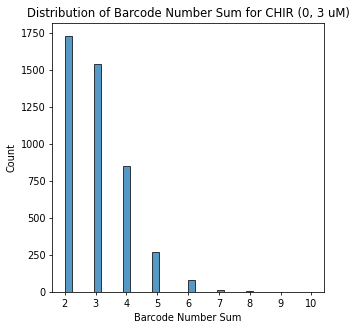

In [10]:
# Ensure correct DataFrame name
bc_df = sc_df[sc_df['BMP2 (ng/ml )'].isin([0, 256])].copy()

# Filter the barcode count column (assuming you want nonzero counts)
bc_count = bc_df['barcode_number sum']

# Plot histogram
plt.figure(figsize=(5,5), dpi = 70)
sns.histplot(bc_count)  # Adjust bins as needed
plt.xlabel('Barcode Number Sum')
plt.ylabel('Count')
plt.title('Distribution of Barcode Number Sum for CHIR (0, 3 uM)')
plt.show()


# Load the synthetic barcode 1 readout data

In [11]:
syn_df = pd.read_csv(data_path + 'synthetic_BC1_reading_noise.csv')
syn_df

,label,area,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity_647,mean_intensity_546,...,barcode,editd positions,edit ratio,intensity_647,intensity_546,int_ratio,int_diff,width,height,mout avg
0,15,62,604.080645,681.306452,600,678,609,686,6292.500000,1275.903226,...,000000000000',0,0.0,12.874248,11.278544,0.876055,-2.302114,9,8,0.209214
1,16,21,603.190476,688.952381,601,687,606,692,5185.904762,1164.761905,...,000000000000',0,0.0,11.598222,10.104794,0.871237,-2.154561,5,5,0.228146
2,17,80,615.825000,558.237500,611,554,621,564,7215.162500,1309.937500,...,000000000000',0,0.0,13.265967,11.559761,0.871385,-2.461534,10,10,0.573377
3,18,72,619.638889,591.152778,615,587,625,596,6510.791667,1376.347222,...,000000000000',0,0.0,13.057882,11.503854,0.880989,-2.241988,10,9,0.814072
4,19,6,708.000000,601.500000,707,601,710,603,3255.500000,1343.166667,...,000000000000',0,0.0,9.879861,8.994545,0.910392,-1.277241,3,2,1.916510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27399,206,6,2019.000000,1615.166667,2018,1614,2021,1617,343.666667,1869.500000,...,111111111111',12,1.0,7.631432,9.325186,1.221944,2.443571,3,3,11.815188
27400,208,18,2023.055556,212.111111,2021,210,2026,215,431.833333,2710.722222,...,111111111111',12,1.0,8.958411,10.795342,1.205051,2.650131,5,5,11.974340
27401,209,26,2031.884615,1640.000000,2029,1638,2036,1643,374.000000,3452.423077,...,111111111111',12,1.0,9.182352,11.404928,1.242049,3.206499,7,5,11.987435
27402,210,19,2033.000000,1687.631579,2031,1686,2036,1691,441.473684,3123.105263,...,111111111111',12,1.0,9.034557,10.991022,1.216553,2.822582,5,5,11.982357


# Notes for BMP-BC1 recording simulation
* Simulation recording with varied edit probability (from 0 to 1). 
* Simulations were performed either under the equal edit probability for all arrays in the same cell or with added normal noise to vary edit probability for different arrays of a cell, which keep the mean   of edit probability constant, and use the std to control the noise level, here varied from 0 to 0.35 as 0.01 interval.
* The barcode array number for each simulated cell is sampled from the single cell barcode array number distribution of BMP-BC1 experimental recording data
* 50 cells were simulated for each edit probability and barcode array number.


In [14]:
# Seed for reproducibility
np.random.seed(49)

# Number of barcodes per array
n = 12  

# Sample function to get 'corrected_mout avg' based on edited positions
def sample_CNN(edit_num):
    return syn_df.loc[syn_df['editd positions'] == edit_num]['mout avg'].sample(n=1).iloc[0]

# Vectorize the sample function
vec_func = np.vectorize(sample_CNN)

# List to store results
results = []

# Simulation loop

for z in np.linspace(0, 0.35, 36):

    for p in np.linspace(0, 1, 101):
        
        for s in range(50):
            # Generate random values clipped to the range [0, 1]
            bc = np.random.choice(bc_count)
            #std = z*p
            p_values = np.clip(np.random.normal(p, z, size=bc), 0, 1)  
            
            CNN_list_sc = []

            for p_value in p_values:
                # Simulate the binomial process
                sample = np.random.binomial(n, p_value, size=1)
                # Collect the sampled 'corrected_mout avg'
                CNN_list_sc.append(vec_func(sample))

            # Flatten the CNN_list_sc list and store results
            results.append((z, bc, p, s, np.mean(CNN_list_sc), np.std(CNN_list_sc)))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Noise','Barcode Count', 'Probability', 'Sample', 'Mean Mout Avg', 'Std Mout Avg'])

# Display the DataFrame
results_df

,Noise,Barcode Count,Probability,Sample,Mean Mout Avg,Std Mout Avg
0,0.00,4,0.0,0,0.137218,0.111714
1,0.00,3,0.0,1,0.781440,0.805531
2,0.00,8,0.0,2,0.254400,0.160918
3,0.00,4,0.0,3,0.314678,0.339591
4,0.00,3,0.0,4,0.381084,0.245580
...,...,...,...,...,...,...
181795,0.35,3,1.0,45,9.444560,2.580052
181796,0.35,5,1.0,46,9.104210,4.375494
181797,0.35,5,1.0,47,7.911395,3.370634
181798,0.35,2,1.0,48,11.803844,0.121767


In [30]:
#results_df.to_csv(data_path + 'simulated_BMP_BC1_recording.csv', index=False)

In [18]:
sc_syn_df = syn_df.groupby(['cell_line', 'position','cell_label', 'editd positions']).agg({
    'int_ratio': ['mean', 'std', lambda x: np.std(x) / np.mean(x) * 100],
    #'corrected_int_ratio': ['mean', 'std', lambda x: np.std(x) / np.mean(x) * 100],
    'mout avg': ['mean', 'std', lambda x: np.std(x) / np.mean(x) * 100],
    'barcode_number': 'sum'
}).reset_index()

# Flatten column names
sc_syn_df.columns = [' '.join(col).strip() for col in sc_syn_df.columns.values]

# Rename lambda columns
sc_syn_df = sc_syn_df.rename(columns={
    'int_ratio <lambda_0>': 'int_ratio CV',
    #'corrected_int_ratio <lambda_0>': 'corrected_int_ratio CV',
    'mout avg <lambda_0>': 'mout avg CV'
})

# Display the grouped DataFrame
sc_syn_df

,cell_line,position,cell_label,editd positions,int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,15,1,25,0,0.874916,0.004626,0.457862,0.456202,0.291441,55.325346,4
1,15,1,27,0,0.890710,0.014785,1.437480,0.905948,0.750822,71.773541,4
2,15,1,31,0,0.875942,0.012771,1.363800,0.531756,0.321847,56.616194,8
3,15,1,34,0,0.876409,0.010257,1.013568,0.282460,0.204728,62.769796,4
4,15,1,35,0,0.870186,0.004675,0.490438,0.165254,0.070490,38.939169,6
...,...,...,...,...,...,...,...,...,...,...,...
3833,75,7,39,1,0.907718,0.014166,1.395812,1.837383,0.360928,17.569787,5
3834,75,7,44,1,0.896305,0.004478,0.407939,1.328534,0.190388,11.700980,3
3835,75,7,47,1,0.918585,0.007200,0.639996,2.126697,0.204395,7.847268,3
3836,75,7,65,1,0.900938,0.008528,0.772856,1.622687,0.332844,16.747901,3


In [19]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

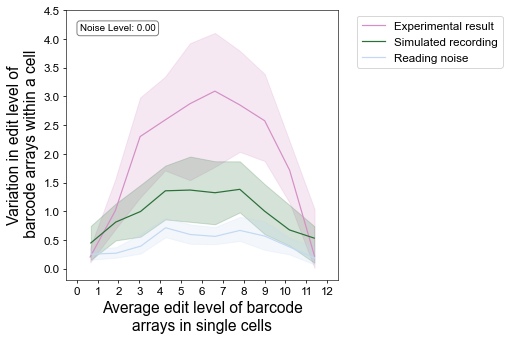

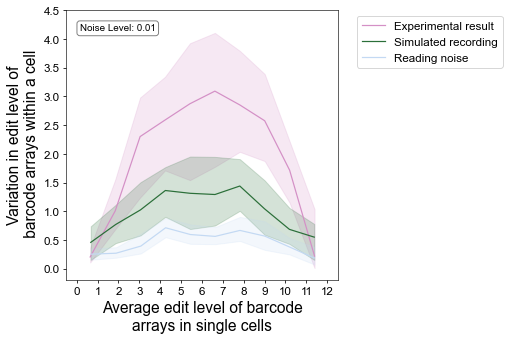

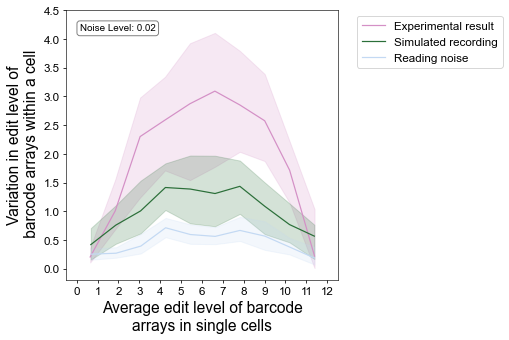

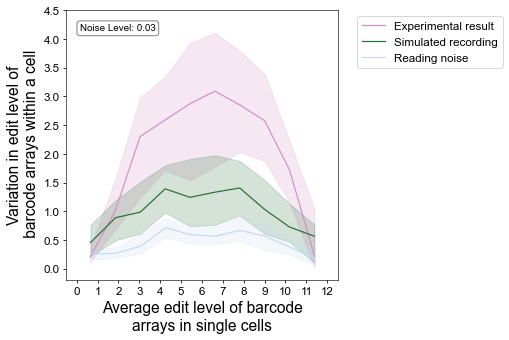

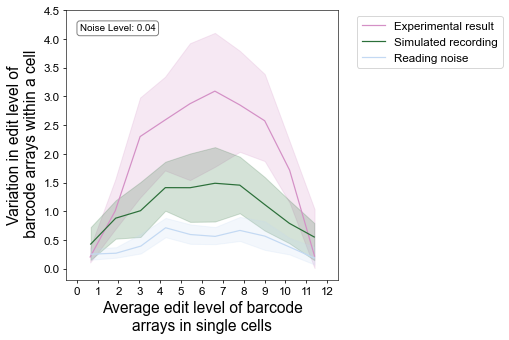

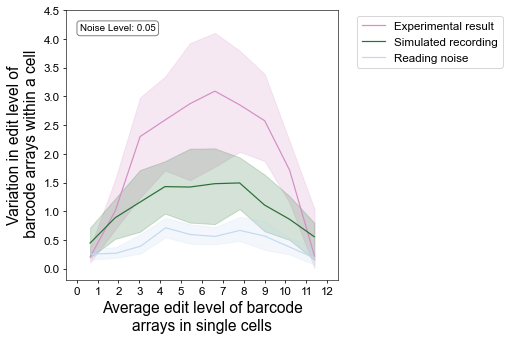

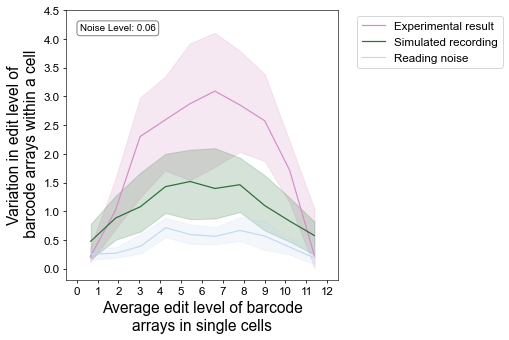

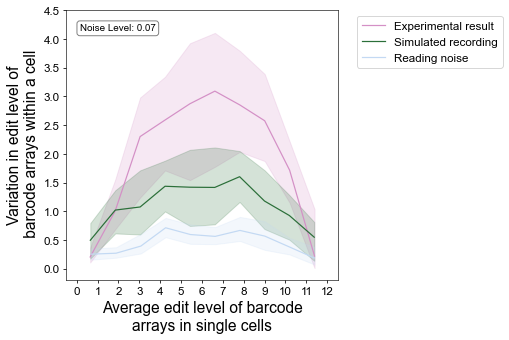

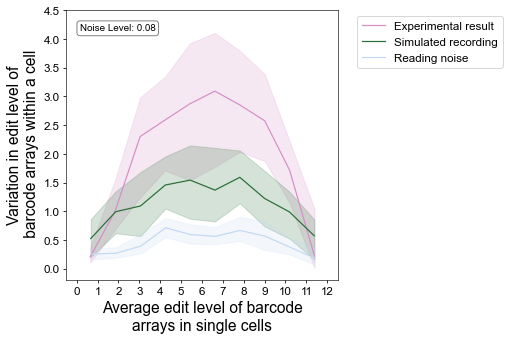

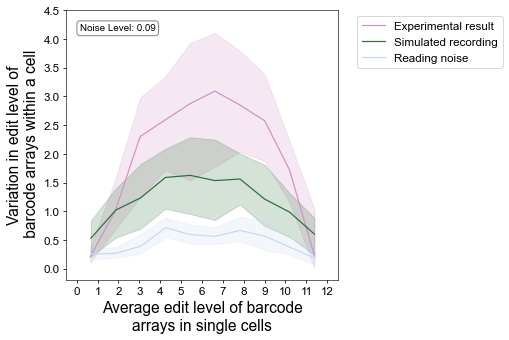

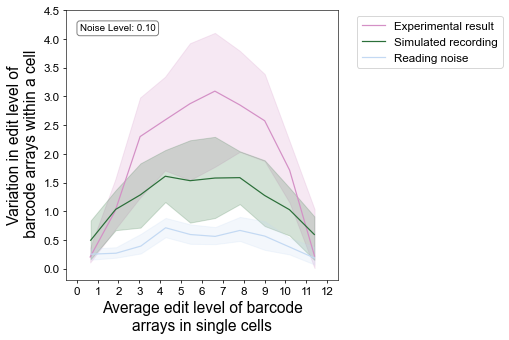

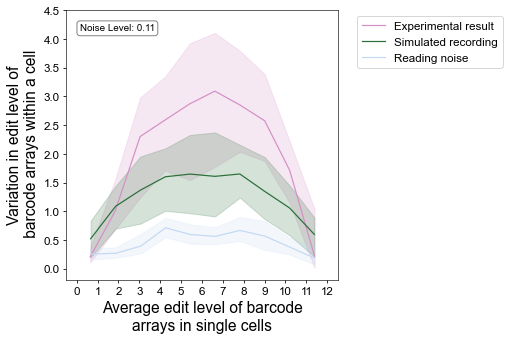

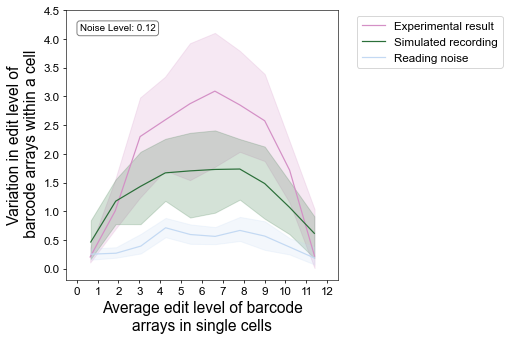

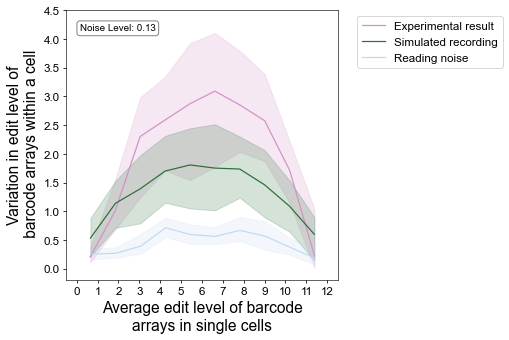

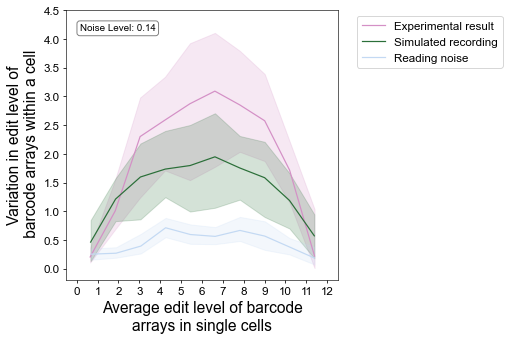

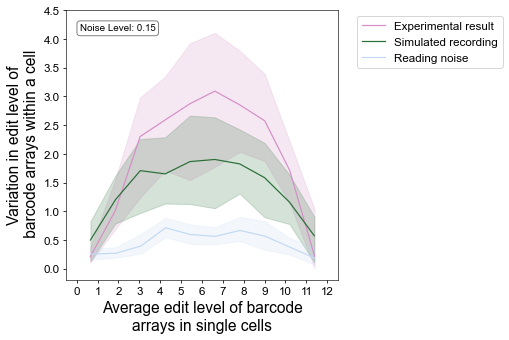

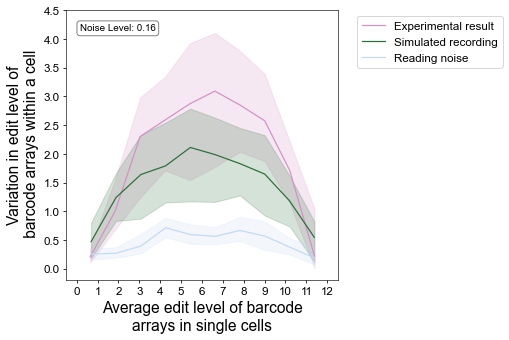

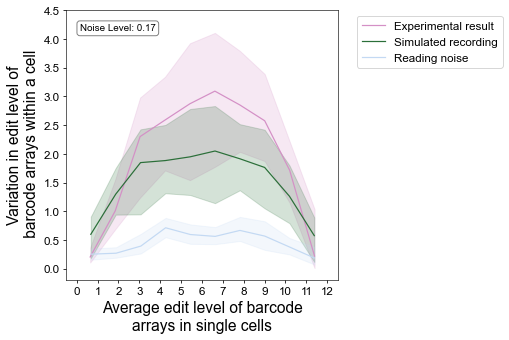

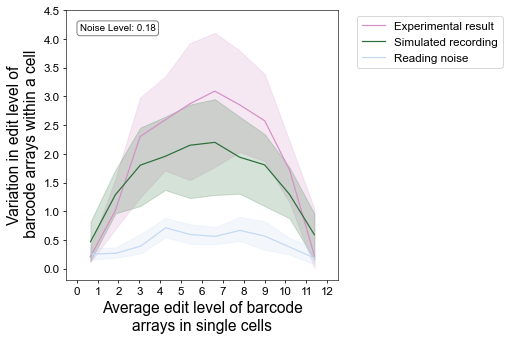

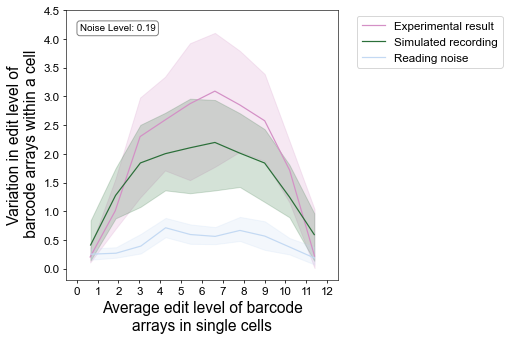

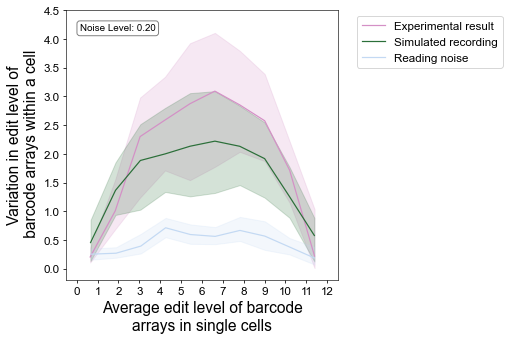

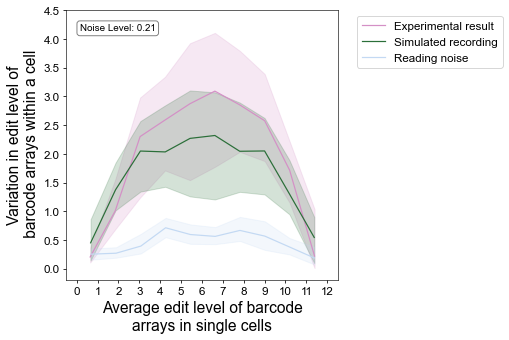

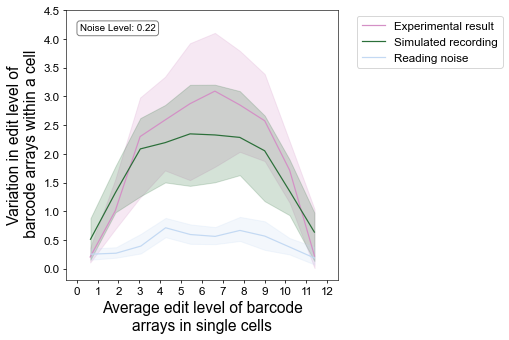

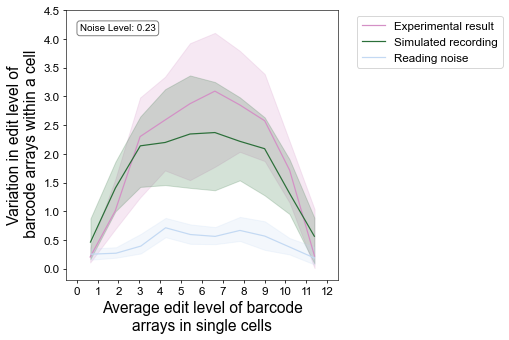

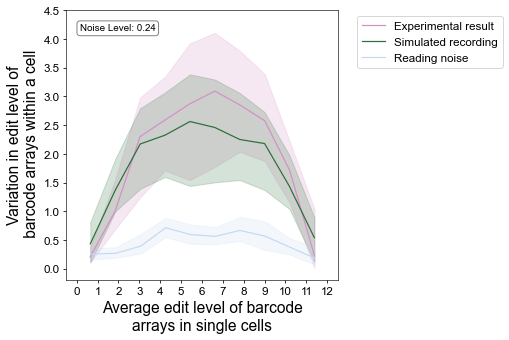

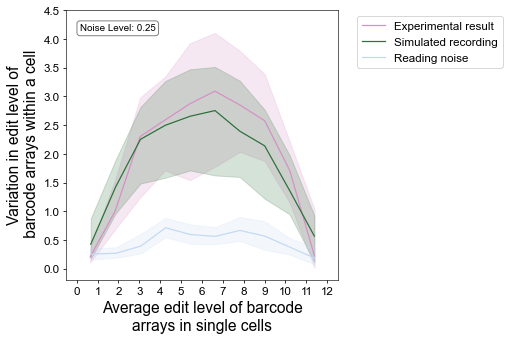

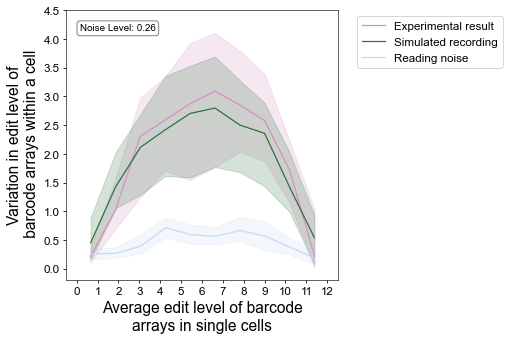

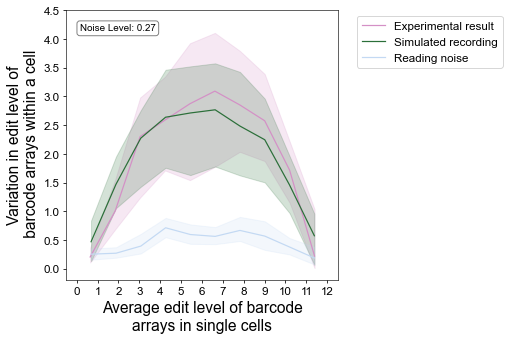

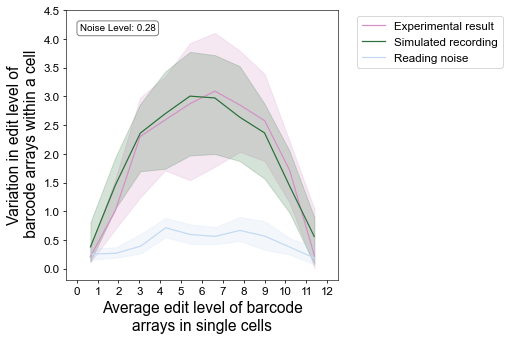

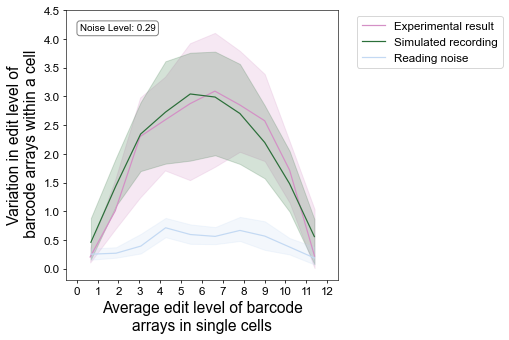

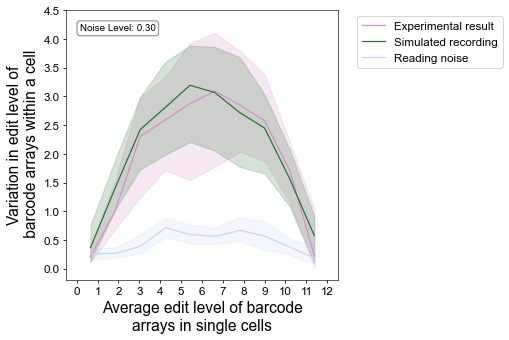

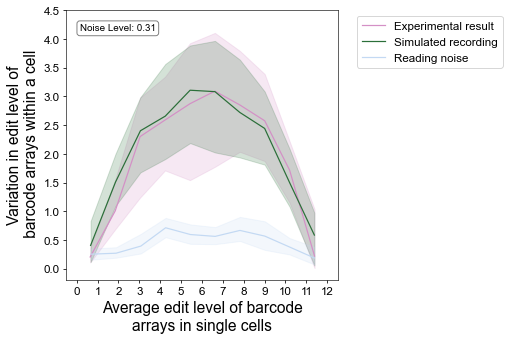

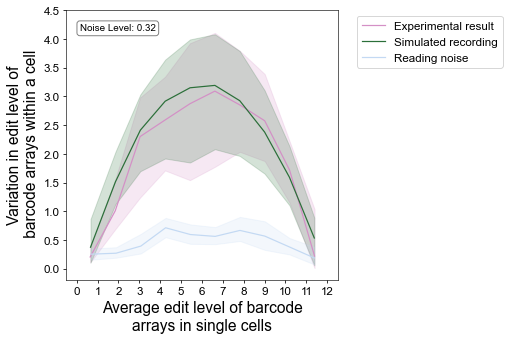

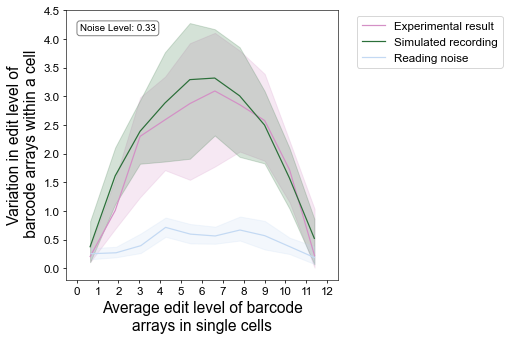

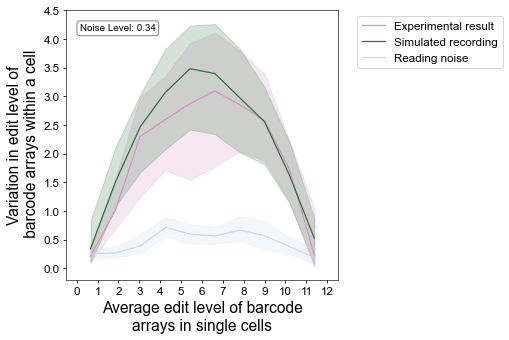

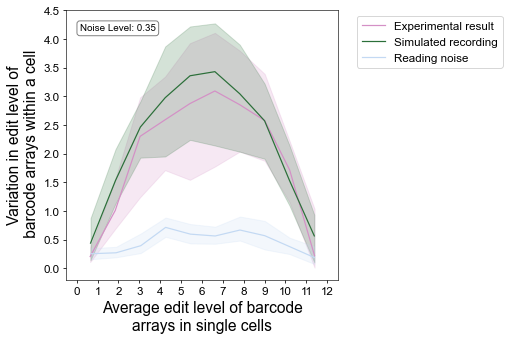

In [33]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate median and IQR for binned data and plot it
def plot_binned_median_iqr(df, x_col, y_col, color, label):
    df['binned'] = pd.cut(df[x_col], bins=10)
    median_df = df.groupby('binned')[y_col].median()
    q1_df = df.groupby('binned')[y_col].quantile(0.25)
    q3_df = df.groupby('binned')[y_col].quantile(0.75)
    bin_centers = [interval.mid for interval in median_df.index]
    
    # Plot IQR
    plt.fill_between(bin_centers, q1_df, q3_df, color=color, alpha=0.2)

    # Plot median
    plt.plot(bin_centers, median_df, color=color, linewidth=1.25, label=label)

custom_palette = sns.color_palette("cubehelix", 5)

# Copy the DataFrames
temp_df = sc_syn_df.copy()
temp_df_1 = pd.concat([
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 256],
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 0]
], ignore_index=True, sort=False).copy()


for z in np.linspace(0, 0.35, 36):
    
    temp_df_2 = results_df.loc[results_df['Noise']==z].copy()
    plt.figure(figsize=(5, 5), dpi=70)

    # Plot binned median and IQR for each DataFrame
    plot_binned_median_iqr(temp_df_1, 'mout avg mean', 'mout avg std', custom_palette[3], 'Experimental result')
    plot_binned_median_iqr(temp_df_2, 'Mean Mout Avg', 'Std Mout Avg', custom_palette[1], 'Simulated recording')
    plot_binned_median_iqr(temp_df, 'mout avg mean', 'mout avg std', custom_palette[4], 'Reading noise')

    # Labels and limits
    plt.xlabel('Average edit level of barcode\narrays in single cells')
    plt.ylabel('Variation in edit level of\n barcode arrays within a cell')
    plt.xlim([-0.5, 12.5])
    #plt.ylim([-0.5, 4.5])
    plt.yticks(np.arange(0, 5, 0.5))  # 0 to 12 with 1 interval
    plt.xticks(np.arange(0, 13, 1))  # 0 to 12 with 1 interval
    # Customize spines
    plt.gca().spines['top'].set_linewidth(0.625)
    plt.gca().spines['right'].set_linewidth(0.625)
    plt.gca().spines['bottom'].set_linewidth(0.625)
    plt.gca().spines['left'].set_linewidth(0.625)

    # Adjust legend
    # Adjust legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
    plt.text(0.05, 0.95, f'Noise Level: {z:.2f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', 
         bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'))
    # Optional save path
    #save_path = os.path.join(data_dir, '240812_Wnt_BC1_readout&writing_noise_with_binned_IQR.svg')
    #plt.savefig(save_path, dpi=300, format='svg', transparent=True)

    plt.show()

# Fig 5E

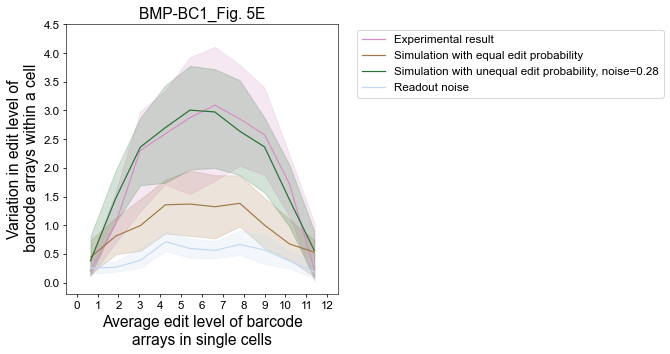

In [28]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=70)

custom_palette = sns.color_palette("cubehelix", 5)

# Copy the DataFrames
temp_df = sc_syn_df.copy()
temp_df_1 = pd.concat([
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 256],
    sc_df.loc[sc_df['BMP2 (ng/ml )'] == 0]
], ignore_index=True, sort=False).copy()

temp_df_2 = results_df.loc[results_df['Noise'] == 0].copy()
temp_df_3 = results_df.loc[results_df['Noise'] == 0.28].copy()

# Scatter plots
#sns.scatterplot(data=temp_df_1, x='mout avg mean', y='mout avg std', alpha=0.75, s=6, edgecolor='none', color=custom_palette[3], label='writing+reading noise')
#sns.scatterplot(data=temp_df_2, y='Std Mout Avg', x='Mean Mout Avg', s=4, alpha=0.5, edgecolor='none', color=custom_palette[1], label='simulation+reading noise')
#sns.scatterplot(data=temp_df, x='mout avg mean', y='mout avg std', alpha=0.5, s=4, edgecolor='none', color=custom_palette[4], label='reading noise')

# Function to calculate median and IQR for binned data and plot it
def plot_binned_median_iqr(df, x_col, y_col, color, label):
    df['binned'] = pd.cut(df[x_col], bins=10)
    median_df = df.groupby('binned')[y_col].median()
    q1_df = df.groupby('binned')[y_col].quantile(0.25)
    q3_df = df.groupby('binned')[y_col].quantile(0.75)
    bin_centers = [interval.mid for interval in median_df.index]

    # Plot IQR
    plt.fill_between(bin_centers, q1_df, q3_df, color=color, alpha=0.2)

    # Plot median
    plt.plot(bin_centers, median_df, color=color, linewidth=1.25, label=label)

# Plot binned median and IQR for each DataFrame
plot_binned_median_iqr(temp_df_1, 'mout avg mean', 'mout avg std', custom_palette[3], 'Experimental result')
plot_binned_median_iqr(temp_df_2, 'Mean Mout Avg', 'Std Mout Avg', custom_palette[2], 'Simulation with equal edit probability')
plot_binned_median_iqr(temp_df_3, 'Mean Mout Avg', 'Std Mout Avg', custom_palette[1], 'Simulation with unequal edit probability, noise=0.28')
plot_binned_median_iqr(temp_df, 'mout avg mean', 'mout avg std', custom_palette[4], 'Readout noise')

# Labels and limits
plt.xlabel('Average edit level of barcode\narrays in single cells')
plt.ylabel('Variation in edit level of\n barcode arrays within a cell')
plt.xlim([-0.5, 12.5])
#plt.ylim([-0.5, 4.5])
plt.yticks(np.arange(0, 5, 0.5))  # 0 to 12 with 1 interval
plt.xticks(np.arange(0, 13, 1))  # 0 to 12 with 1 interval
# Customize spines
plt.gca().spines['top'].set_linewidth(0.625)
plt.gca().spines['right'].set_linewidth(0.625)
plt.gca().spines['bottom'].set_linewidth(0.625)
plt.gca().spines['left'].set_linewidth(0.625)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
plt.title('BMP-BC1_Fig. 5E')
# Optional save path
#save_path = os.path.join(data_dir, '240812_BMP_BC1_readout&writing_noise_with_binned_IQR.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)

plt.show()